In [159]:
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
df_supermarket = pd.read_json('supermarket.json')
print(df_supermarket.head())

                                               lojas
0  {'id': 1, 'dados_mensais': [{'mes': 1, 'fatura...
1  {'id': 2, 'dados_mensais': [{'mes': 1, 'fatura...
2  {'id': 3, 'dados_mensais': [{'mes': 1, 'fatura...
3  {'id': 4, 'dados_mensais': [{'mes': 1, 'fatura...
4  {'id': 5, 'dados_mensais': [{'mes': 1, 'fatura...


In [152]:
# Faturamento por loja por mês
def extrair_dados_loja(loja_id, mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    return dados_mensais
    return None


extrair_dados_loja(1,1)

{'mes': 1,
 'faturamento': {'higiene_e_saude': 15200,
  'limpeza': 19800,
  'bebidas': 8600,
  'carne_e_laticinios': 4900,
  'alimentacao': 5300},
 'gastos_funcionarios': 20000,
 'despesas_fornecedores': 15000,
 'gastos_diversos': 5000}

In [153]:
# Faturamento total por loja por mês
def extrair_faturamento_loja(loja_id, mes):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    for faturamento_total in dados_mensais['faturamento']:
                        faturamento_total = sum(dados_mensais['faturamento'].values())
                        return faturamento_total
    return None


extrair_faturamento_loja(3,2)

53200

In [154]:
# Faturamento loja por ano
def extrair_faturamento_loja_ano(loja_id):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                for faturamento_mensal in dados_mensais['faturamento']:
                    faturamento_mensal = sum(dados_mensais['faturamento'].values())
    return faturamento_mensal

extrair_faturamento_loja_ano(1)

53400

In [155]:
# Lucro loja por ano
def extrair_lucro_loja_ano(loja_id):
    for loja in df_supermarket['lojas']:
        if loja['id'] == loja_id:
            faturamento_mes = 0
            lucro_anual = 0
            for dados_mensais in loja['dados_mensais']:
                faturamento_mes =  sum(dados_mensais['faturamento'].values())
                gastos_mes = dados_mensais['gastos_funcionarios'] + dados_mensais['despesas_fornecedores'] + dados_mensais['gastos_diversos']
                lucro_anual += (faturamento_mes - gastos_mes)
            print(faturamento_mes)
            print(gastos_mes)
            print(lucro_anual)
    return lucro_anual
    
extrair_lucro_loja_ano(1)

53400
63100
26200


26200

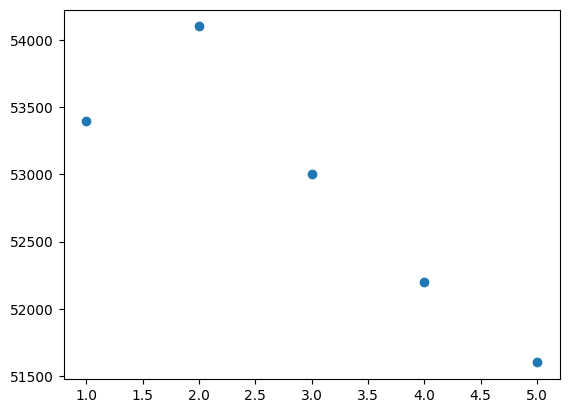

In [160]:
lojas = range(1,6)
faturamento = []
for i in lojas:
    faturamento.append(extrair_faturamento_loja_ano(i))

plt.plot(lojas, faturamento, 'o')

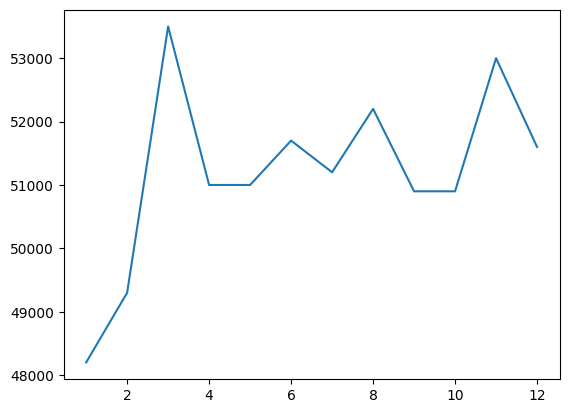

In [164]:
meses = range(1,13)
faturamento_mes = []
for i in meses:
    faturamento_mes.append(extrair_faturamento_loja(5,i))

plt.plot(meses, faturamento_mes, '-')